### **Import Libraries**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import torch
from torch import nn
from torch import optim
import requests
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### **Create Dataset**

In [41]:
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = 2,
                            cluster_std = 1.5, # The standard deviation of the clusters.
                            centers = 4, # Number of classes
                            random_state = 42)

print(X_blob[:5]), print(y_blob[:5])

[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]]
[3 2 2 1 1]


(None, None)

### **Check Dataset Shape**

In [42]:
print(f'\nInput Data Set Shape:  {X_blob.shape}')
print(f'\nInput Sample Shape: {X_blob[0].shape} ')
print(f'\nOutput Data Set Shape: {y_blob.shape}')
print(f'\nOutput Sample Shape: {y_blob[0].shape}')


Input Data Set Shape:  (1000, 2)

Input Sample Shape: (2,) 

Output Data Set Shape: (1000,)

Output Sample Shape: ()


### **Turn Data Into Tensors**

In [43]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

print(X_blob.dtype), print(y_blob.dtype)

torch.float32
torch.int64


(None, None)

### **Split Data Set Into Training and Test Sets**

In [44]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = 42)
print(f'Number of Training Data: {len(X_blob_train)}')
print(f'Number of Test Data: {len(X_blob_test)}')

Number of Training Data: 800
Number of Test Data: 200


### **Visualize Data Sets**

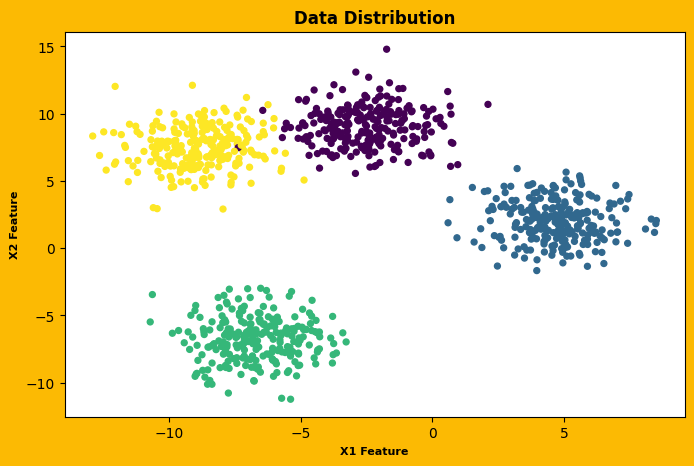

In [45]:
plt.figure(figsize=(8,5), facecolor='#fcba03')
plt.xlabel('X1 Feature', color='k', weight='bold', size=8)
plt.ylabel('X2 Feature', color='k', weight='bold', size=8 )
plt.title('Data Distribution', color='k', weight='bold', size=12)
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c=y_blob,
            s=18,
            cmap = 'viridis')
plt.show()

### **Make Device Agnostic Code**

In [46]:
device  ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### **Architecturing the Model**

In [47]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.stacked_layer = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    ).to(device)
  def forward(self, x):
    return self.stacked_layer(x)

### **Create an Instance of model**

In [48]:
model = BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8
                  ).to(device)
model

BlobModel(
  (stacked_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### **Define Loss Function / Optimizer / Accuracy Function**

In [49]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(),
                      lr=0.1)
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = correct / len(y_pred) * 100
  return accuracy

### **Make Predictions**

In [50]:
torch.manual_seed(42)
with torch.inference_mode():
  y_logits = model(X_blob_test).to(device).squeeze()
y_logits

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1045e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2929e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

### **Architecturing the Output Layer**
###### **Logits --> Probability Predictions --> Prediction Labels**

In [51]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds, y_blob_train

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0, 1]),
 tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
         3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
         1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
         3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1,

### **Training and Testing Loops**

In [54]:
# Set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put datasets into target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Define number of epochs
epochs = 100

# Count
epoch_count = []
loss_count = []
acc_count = []
test_loss_count = []
test_acc_count = []

# Loop
for epoch in range(epochs):
  # Training Loop
  model.train()
  # Forward Pass
  y_logits = model(X_blob_train).to(device).squeeze()
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_preds = torch.argmax(y_pred_probs, dim=1)
  # Calculate
  loss = loss_function(y_logits, y_blob_train)
  acc = accuracy_function(y_true=y_blob_train,
                          y_pred = y_preds)
  # Zero Gradient Optimizer
  optimizer.zero_grad()
  # Backward Pass
  loss.backward()
  # Optimizing step by step
  optimizer.step()

  # Testing
  model.eval()
  # Forward Pass
  with torch.inference_mode():
    test_logits = model(X_blob_test).squeeze()
    test_pred_probs = torch.softmax(test_logits, dim=1)
    test_preds = torch.argmax(test_pred_probs, dim=1)
  # Calculate
  test_loss = loss_function(test_logits, y_blob_test)
  test_acc = accuracy_function(y_true=y_blob_test,
                               y_pred=test_preds)

  # What is happening
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_count.append(loss.detach().numpy())
    acc_count.append(acc)
    test_loss_count.append(test_loss.detach().numpy())
    test_acc_count.append(test_acc)
    print(f' Epoch: {epoch} | loss: {loss}, acc: {acc} | test_loss: {test_loss}, test_acc: {test_acc}')

 Epoch: 0 | loss: 1.1588267087936401, acc: 40.375 | test_loss: 1.0755422115325928, test_acc: 48.0
 Epoch: 10 | loss: 0.6447553038597107, acc: 96.75 | test_loss: 0.660687267780304, test_acc: 97.5
 Epoch: 20 | loss: 0.4253515303134918, acc: 98.5 | test_loss: 0.43074119091033936, test_acc: 100.0
 Epoch: 30 | loss: 0.2529422640800476, acc: 99.125 | test_loss: 0.24507610499858856, test_acc: 99.5
 Epoch: 40 | loss: 0.11232147365808487, acc: 99.25 | test_loss: 0.10228512436151505, test_acc: 99.5
 Epoch: 50 | loss: 0.06626509130001068, acc: 99.25 | test_loss: 0.058475371450185776, test_acc: 99.5
 Epoch: 60 | loss: 0.05068016052246094, acc: 99.25 | test_loss: 0.042932283133268356, test_acc: 99.5
 Epoch: 70 | loss: 0.04299675300717354, acc: 99.25 | test_loss: 0.034909654408693314, test_acc: 99.5
 Epoch: 80 | loss: 0.038361385464668274, acc: 99.25 | test_loss: 0.02987821027636528, test_acc: 99.5
 Epoch: 90 | loss: 0.03524842858314514, acc: 99.25 | test_loss: 0.02662651054561138, test_acc: 99.5


### **Import functions for visualizing**

In [60]:
if Path('helper_functions.py').is_file():
  print('"helper_functions.py" already exists')
else:
  print('"helper_functions.py" is downloading ..')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f :
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

"helper_functions.py" is downloading ..


### **Visualize Loss and Accuracy Changes**



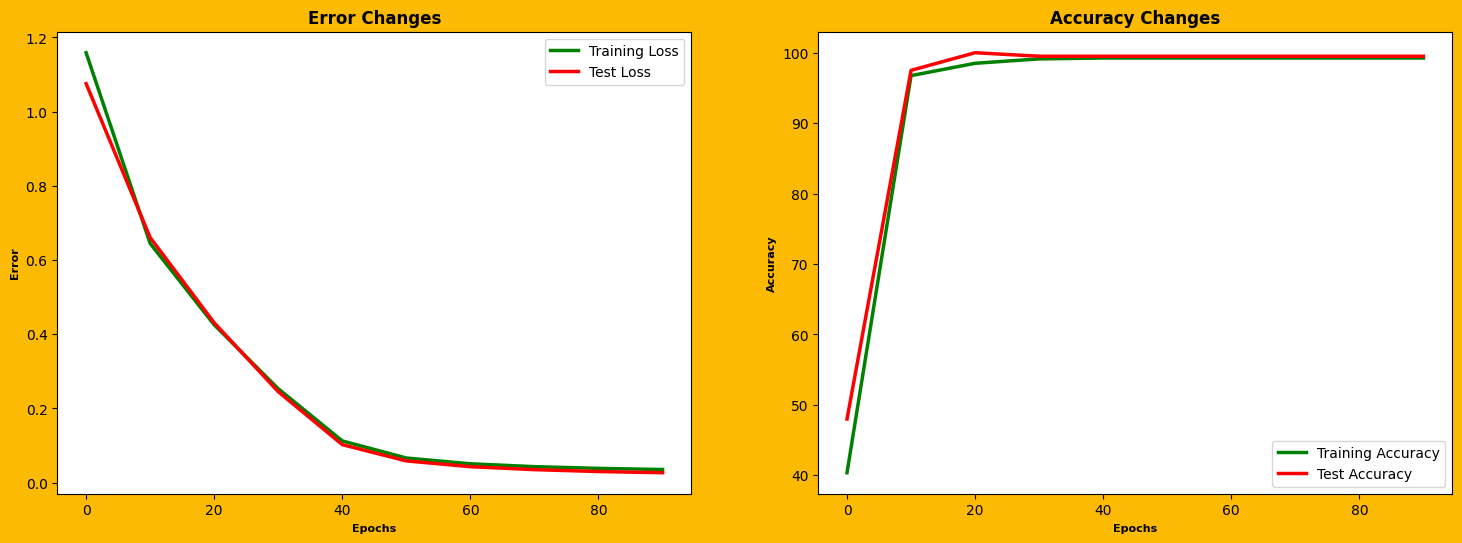

In [66]:
plt.figure(figsize=(18,6), facecolor='#fcba03')
plt.subplot(1,2,1)
plt.xlabel('Epochs', color='k', weight='bold', size=8)
plt.ylabel('Error', color='k', weight='bold', size=8 )
plt.title('Error Changes', color='k', weight='bold', size=12)
plt.plot(epoch_count, loss_count, label='Training Loss', linewidth=2.5, color='g')
plt.plot(epoch_count, test_loss_count, label='Test Loss', linewidth=2.5, color='r')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs', color='k', weight='bold', size=8)
plt.ylabel('Accuracy', color='k', weight='bold', size=8 )
plt.title('Accuracy Changes', color='k', weight='bold', size=12)
plt.plot(epoch_count, acc_count, label='Training Accuracy', linewidth=2.5, color='g')
plt.plot(epoch_count, test_acc_count, label='Test Accuracy', linewidth=2.5, color='r')
plt.legend()
plt.show()


### **Visualize Decision Boundaries**

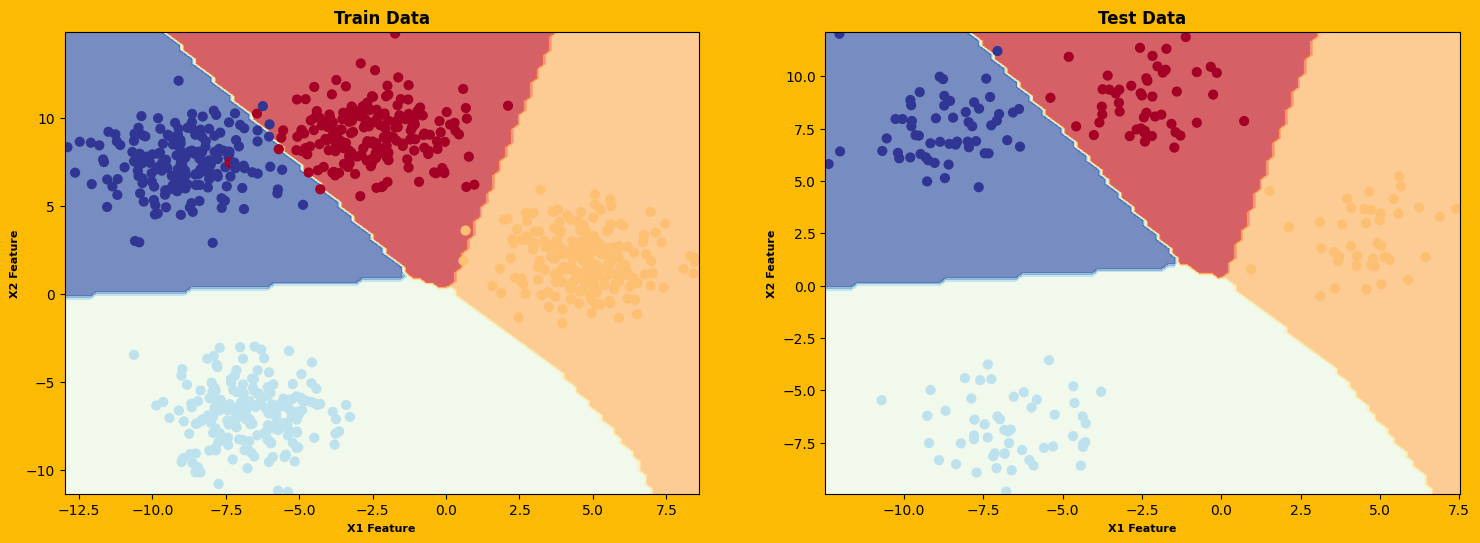

In [69]:
plt.figure(figsize=(18,6), facecolor='#fcba03')
plt.subplot(1,2,1)
plt.xlabel('X1 Feature', color='k', weight='bold', size=8)
plt.ylabel('X2 Feature', color='k', weight='bold', size=8 )
plt.title('Train Data', color='k', weight='bold', size=12)
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.xlabel('X1 Feature', color='k', weight='bold', size=8)
plt.ylabel('X2 Feature', color='k', weight='bold', size=8 )
plt.title('Test Data', color='k', weight='bold', size=12)
plot_decision_boundary(model, X_blob_test, y_blob_test)
plt.show()


### **Make Predictions**

In [68]:
model.eval()
with torch.inference_mode():
  y_logits=model(X_blob_test).squeeze()
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

### **Save Model**

In [70]:
# Path
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)
# Name
model_name = '02_Classification.pth'
# Save Path
model_save_path = model_path / model_name
# Saving
torch.save(obj=model.state_dict(),
           f=model_save_path)
print(f'The model is saving in: {model_save_path}')

The model is saving in: models/02_Classification.pth


In [71]:
# Save Checking
!ls -l models/02_Classification.pth

-rw-r--r-- 1 root root 3308 Dec 12 13:58 models/02_Classification.pth


### **Load Model**

In [74]:
loaded_model = BlobModel(input_features=2,
                         output_features=4,
                         hidden_units=8).to(device)
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model

<ipython-input-74-8410003fe0cb>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_save_path))


BlobModel(
  (stacked_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### **Make Predictions with Loaded Model**

In [76]:
loaded_model.eval()
with torch.inference_mode():
  y_logits = loaded_model(X_blob_test.to(device)).squeeze()
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))